In [1]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS


pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline


## Load in P4K/Spotify combined CSV into Dataframe

In [2]:
combined_reviews_fname = 'sp-&-p4k_combined-2017-utf8sig-final.csv'

sp_p4k_2017_df = pd.read_csv(combined_reviews_fname, index_col = 0)

sp_p4k_2017_df.tail()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.4337,0.4270,0.6402,0.2764,0.1942,-7.2556,0.0519,...,0.4747,5.7778,1638435,0,Mega Bog,0,February 6 2017,Experimental,Mega Bog is the malleable rock band mastermind...,7.4000
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.1792,0.5723,0.6933,0.5878,0.1883,-6.0307,0.0513,...,0.1758,9.5000,1548171,0,Suicideyear,0,July 28 2017,Electronic,Stepping away from his habitual trap beats and...,7.3000
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.1496,0.6924,0.7748,0.0038,0.2771,-5.6680,0.3424,...,0.6352,44.8824,4294841,17,The Notorious B.I.G.,0,March 9 2017,Rap,The half-baked 1999 release Born Again reeks o...,6.0000
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.0671,0.5226,0.6552,0.0029,0.2239,-7.2379,0.0403,...,0.5956,41.2000,2248784,1,Alexandra Savior,0,April 19 2017,Pop/R&B,The young American singer launches her career ...,6.0000
1062,spotify:album:7zy6BF4J1cdLVZaPoTbLa7,All Blue,G Perico,0.1640,0.8337,0.6395,0.0000,0.1961,-6.9567,0.3181,...,0.5325,22.1818,1774000,11,G Perico,0,May 5 2017,Rap,While nodding to West Coast legends of the ’90...,7.9000


## Sanity Checks

In [3]:
sp_p4k_2017_df.columns

Index(['album_uri', 'album', 'album_artist', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'duration_ms', 'is_explicit',
       'artist', 'best', 'date', 'genre', 'review', 'score'],
      dtype='object')

In [4]:
sp_p4k_2017_df.date.value_counts()

October 2 2017      5
October 30 2017     5
April 4 2017        5
January 30 2017     5
April 24 2017       5
                   ..
February 19 2017    1
March 12 2017       1
August 13 2017      1
March 19 2017       1
October 8 2017      1
Name: date, Length: 346, dtype: int64

**Comment on dates**

All dates are formated as "[Month spelled out] [date] [year fully written XXXX]"

In [5]:
sp_p4k_2017_df.shape

(1063, 21)

In [6]:
sp_p4k_2017_df.describe()

# Loudness: more negative means less loud.

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score
count,"1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000","1,063.0000"
mean,0.3060,0.5114,0.5958,0.2945,0.1952,-9.4285,0.0944,119.7187,0.3858,23.7076,"2,772,106.4083",2.1317,0.0696,7.2948
std,0.2482,0.1554,0.1829,0.3049,0.0890,3.9188,0.0812,13.4944,0.1701,16.4774,"1,508,422.6319",4.7577,0.2546,0.9337
min,0.0000,0.0645,0.0075,0.0000,0.0709,-36.4756,0.0270,67.0175,0.0189,0.0000,"180,442.0000",0.0000,0.0000,2.8000
25%,0.1130,0.4092,0.4769,0.0190,0.1376,-11.2794,0.0422,112.0647,0.2581,9.4018,"2,077,869.5000",0.0000,0.0000,6.8000
50%,0.2428,0.5212,0.6142,0.1735,0.1764,-8.7179,0.0595,119.8267,0.3887,22.3333,"2,510,019.0000",0.0000,0.0000,7.4000
75%,0.4479,0.6252,0.7271,0.5676,0.2276,-6.6023,0.1063,128.0343,0.5003,35.3333,"3,111,877.0000",1.0000,0.0000,7.8000
max,0.9930,0.9290,0.9852,0.9918,0.8670,-2.0892,0.4235,193.2440,0.9021,75.2000,"16,584,080.0000",24.0000,1.0000,10.0000


In [9]:
mean_score_allData = sp_p4k_2017_df.score.mean()
mean_pop_allData = sp_p4k_2017_df.popularity.mean()
mean_pop_allData

23.70756238022422

In [10]:
sp_p4k_2017_df.head()

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,valence,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score
0,spotify:album:00LS6GJwb5ZPTKS8NMAT8x,Ultramega OK,Soundgarden,0.0167,0.3555,0.8228,0.2762,0.1938,-8.2745,0.0634,...,0.3511,23.5263,4224568,0,Soundgarden,0,March 20 2017,Rock,"Originally released in 1988 on SST, Soundgarde...",7.3000
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,0.6659,27.6429,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000
2,spotify:album:00RnMn3ikeVB6gdOMZ3mwQ,No Mountains in Manhattan,Wiki,0.4477,0.5967,0.7189,0.0005,0.3150,-6.6996,0.3737,...,0.6231,18.4000,3191839,15,Wiki,0,August 30 2017,Rap,Wiki’s new album is an acidic and vivid manife...,8.1000
3,spotify:album:02ER13KaisZo5CG2BydCWn,Americana,Ray Davies,0.4588,0.5249,0.4491,0.0010,0.1896,-12.1996,0.0432,...,0.4505,11.6667,3511114,0,Ray Davies,0,April 18 2017,Rock,The Kinks legend uses Americana to blaze a pat...,7.3000
4,spotify:album:02Lx6I5EsUDFIdnS3pSNNT,Rosewood Almanac,Will Stratton,0.6693,0.4786,0.3263,0.0458,0.1885,-12.1106,0.0342,...,0.3691,7.6667,1775810,0,Will Stratton,0,May 22 2017,Folk/Country,"With pastoral folk roots, New York singer-song...",7.0000


In [11]:
sp_p4k_2017_df.genre.value_counts()

Rock            353
Electronic      201
Rap             148
Pop/R&B         106
Experimental     98
Metal            49
Folk/Country     41
None             29
Global           20
Jazz             18
Name: genre, dtype: int64

In [12]:
sp_p4k_2017_df.best.value_counts()

0    989
1     74
Name: best, dtype: int64

In [13]:
sp_p4k_2017_df[sp_p4k_2017_df.best == 1].genre.value_counts()

Rock            28
Electronic      13
Rap              9
Pop/R&B          9
None             4
Jazz             3
Experimental     3
Folk/Country     2
Metal            2
Global           1
Name: genre, dtype: int64

In [ ]:
(sp_p4k_2017_df[sp_p4k_2017_df.best == 1].genre.value_counts()/sp_p4k_2017_df.genre.value_counts() * 100).sort_values(ascending=False)

## Word Cloud Stuff

In [15]:
sp_p4k_2017_df.review

0       Originally released in 1988 on SST, Soundgarde...
1       With its pithy, searing songs about sex, group...
2       Wiki’s new album is an acidic and vivid manife...
3       The Kinks legend uses Americana to blaze a pat...
4       With pastoral folk roots, New York singer-song...
                              ...                        
1058    Mega Bog is the malleable rock band mastermind...
1059    Stepping away from his habitual trap beats and...
1060    The half-baked 1999 release Born Again reeks o...
1061    The young American singer launches her career ...
1062    While nodding to West Coast legends of the ’90...
Name: review, Length: 1063, dtype: object

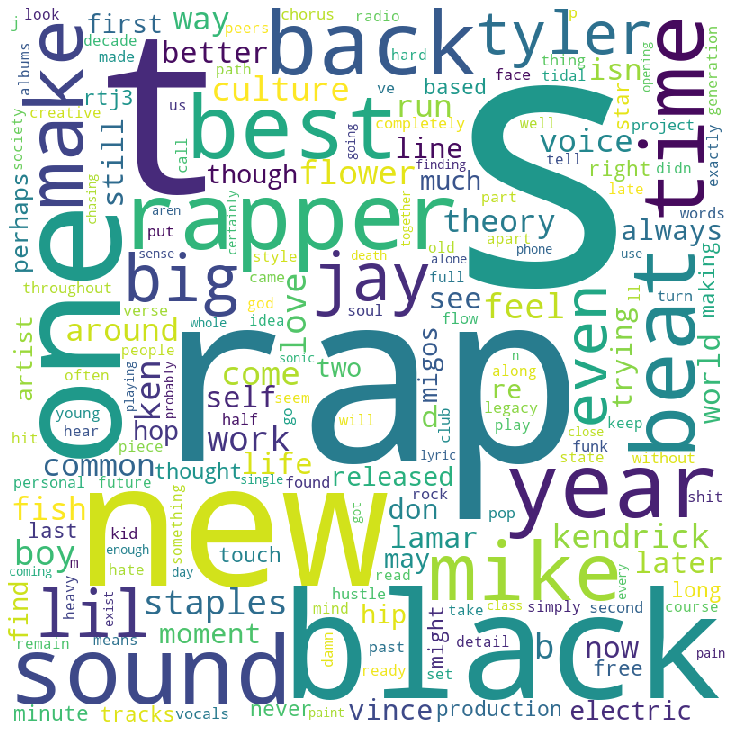

In [16]:
comment_words = ''
additional_stopwords = set(("song", "album", "record", "music", "songs", "track"))
stopwords =  set(STOPWORDS).union(additional_stopwords)

df_word_cloud = sp_p4k_2017_df[sp_p4k_2017_df.best == 1]
df_word_cloud = df_word_cloud[df_word_cloud.genre == 'Rap'].review

# iterate through the csv file
for val in df_word_cloud:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
    tokens = [token for token in tokens if len(token) > 1]
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, collocations=False).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

**Word Cloud Function**

In [17]:
def plotWordCloud(df_word_cloud):
    """
    Input any df with reviews in it. Generates word clout plot for their reviews.
    """
    comment_words = ''
    additional_stopwords = set(("song", "album", "record", "music", "songs", "track"))
    stopwords =  set(STOPWORDS).union(additional_stopwords)

    df_word_cloud = df_word_cloud.review

    # iterate through the csv file
    for val in df_word_cloud:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()
        tokens = [token for token in tokens if len(token) > 1]

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10, collocations=False).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

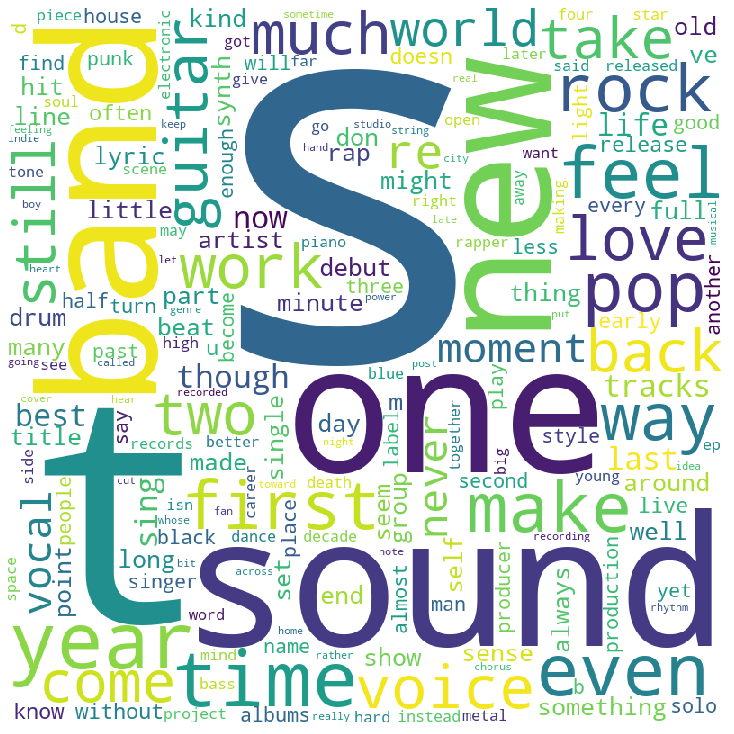

In [18]:
plotWordCloud(sp_p4k_2017_df)

## Add column to DF to indicate if album is in Group 1, 2, 3, 4

Group 1: "favorites"
- above average popularity, above average score

Group 2: "underrated"
- below average popularity, above average score

Group 3: "overrated"
- above average popularity, below average score

Group 4: "ignorables"
- below average popularity, below average score

**Get the average popularity and average score of all DF, create function to sort into the groups**

In [23]:
mean_score_allData = sp_p4k_2017_df.score.mean()
mean_pop_allData = sp_p4k_2017_df.popularity.mean()

def label_group(row):
   if (row['popularity'] > mean_pop_allData) and (row['score'] > mean_score_allData) :
      return 'favorites'
   if (row['popularity'] <= mean_pop_allData) and (row['score'] > mean_score_allData) :
      return 'underrated'
   if (row['popularity'] > mean_pop_allData) and (row['score'] <= mean_score_allData) :
      return 'overrated'
   else:
      return 'ignorables'
    


**Modify original DF to have this column or create copy. Here we modify the original.**

In [ ]:
# sp_p4k_2017_df.apply(lambda row: label_group(row), axis=1)
sp_p4k_2017_df['group_label'] = sp_p4k_2017_df.apply(lambda row: label_group(row), axis=1)

In [24]:
sp_p4k_2017_df

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,popularity,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label
0,spotify:album:00LS6GJwb5ZPTKS8NMAT8x,Ultramega OK,Soundgarden,0.0167,0.3555,0.8228,0.2762,0.1938,-8.2745,0.0634,...,23.5263,4224568,0,Soundgarden,0,March 20 2017,Rock,"Originally released in 1988 on SST, Soundgarde...",7.3000,underrated
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,27.6429,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000,favorites
2,spotify:album:00RnMn3ikeVB6gdOMZ3mwQ,No Mountains in Manhattan,Wiki,0.4477,0.5967,0.7189,0.0005,0.3150,-6.6996,0.3737,...,18.4000,3191839,15,Wiki,0,August 30 2017,Rap,Wiki’s new album is an acidic and vivid manife...,8.1000,underrated
3,spotify:album:02ER13KaisZo5CG2BydCWn,Americana,Ray Davies,0.4588,0.5249,0.4491,0.0010,0.1896,-12.1996,0.0432,...,11.6667,3511114,0,Ray Davies,0,April 18 2017,Rock,The Kinks legend uses Americana to blaze a pat...,7.3000,underrated
4,spotify:album:02Lx6I5EsUDFIdnS3pSNNT,Rosewood Almanac,Will Stratton,0.6693,0.4786,0.3263,0.0458,0.1885,-12.1106,0.0342,...,7.6667,1775810,0,Will Stratton,0,May 22 2017,Folk/Country,"With pastoral folk roots, New York singer-song...",7.0000,ignorables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,spotify:album:7z7hGOK5ZvGQ2rCp9TyMHc,Happy Together,Mega Bog,0.4337,0.4270,0.6402,0.2764,0.1942,-7.2556,0.0519,...,5.7778,1638435,0,Mega Bog,0,February 6 2017,Experimental,Mega Bog is the malleable rock band mastermind...,7.4000,underrated
1059,spotify:album:7zJ6TVgvzdV9HPE8KA2a7R,Hate Songs EP,Suicideyear,0.1792,0.5723,0.6933,0.5878,0.1883,-6.0307,0.0513,...,9.5000,1548171,0,Suicideyear,0,July 28 2017,Electronic,Stepping away from his habitual trap beats and...,7.3000,underrated
1060,spotify:album:7zg9ZSOQtYLjWnvSawflg6,Born Again,The Notorious B.I.G.,0.1496,0.6924,0.7748,0.0038,0.2771,-5.6680,0.3424,...,44.8824,4294841,17,The Notorious B.I.G.,0,March 9 2017,Rap,The half-baked 1999 release Born Again reeks o...,6.0000,overrated
1061,spotify:album:7zo4kiBFeJ6fTRJLTKo7XU,Belladonna of Sadness,Alexandra Savior,0.0671,0.5226,0.6552,0.0029,0.2239,-7.2379,0.0403,...,41.2000,2248784,1,Alexandra Savior,0,April 19 2017,Pop/R&B,The young American singer launches her career ...,6.0000,overrated


In [25]:
sp_p4k_2017_df.group_label.value_counts()

underrated    325
favorites     284
ignorables    242
overrated     212
Name: group_label, dtype: int64

In [28]:
by_group = sp_p4k_2017_df.groupby('group_label')
by_group

In [29]:
by_group.mean()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,is_explicit,best,score
group_label,,,,,,,,,,,,,,
favorites,0.3249,0.5341,0.5778,0.1997,0.1952,-9.3820,0.1023,118.9949,0.4098,37.4494,"2,959,988.9859",3.0035,0.1796,8.0620
ignorables,0.3091,0.4879,0.6033,0.3655,0.1907,-9.7429,0.0836,119.8860,0.3733,10.5490,"2,472,197.7231",0.8843,0.0000,6.6248
overrated,0.2206,0.5804,0.6423,0.1364,0.1951,-7.5041,0.1111,121.1502,0.4226,39.3938,"2,676,713.3255",4.5660,0.0000,6.3132
underrated,0.3428,0.4640,0.5756,0.4277,0.1986,-10.4904,0.0847,119.2928,0.3503,11.2651,"2,893,468.2031",0.7108,0.0708,7.7637


**Example: Generate Word Cloud of Ignorable Albums, rap albums, 50 lowest scored.**

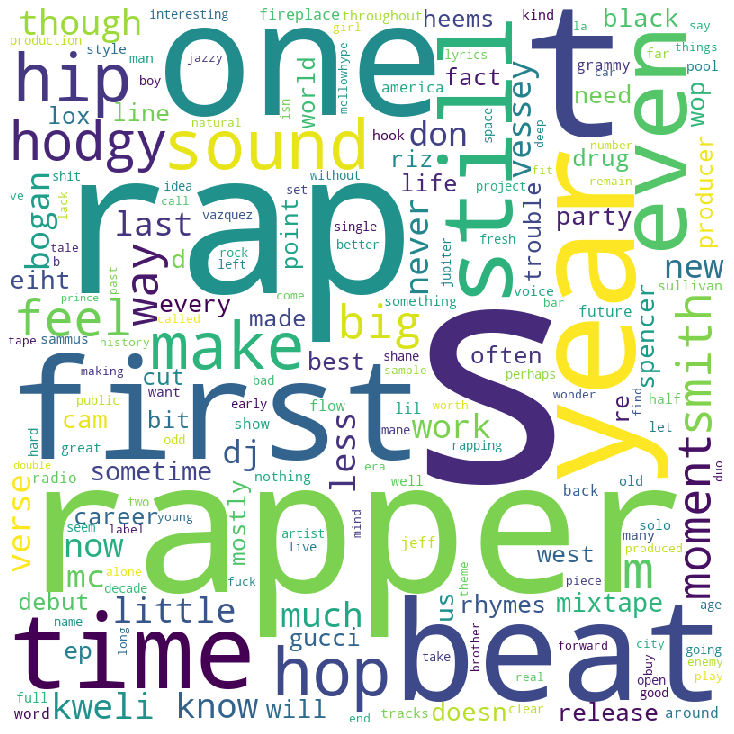

In [41]:
temp = by_group.get_group('ignorables')
temp = temp[temp.genre == 'Rap'].sort_values('score', ascending=False)
plotWordCloud(temp.tail(20))

In [32]:
temp = sp_p4k_2017_df.groupby(['group_label', 'genre'])
temp.mean()

acousticness  danceability  energy  \
group_label genre                                              
favorites   Electronic          0.3533        0.5462  0.5377   
            Experimental        0.5279        0.4006  0.4232   
            Folk/Country        0.6819        0.5045  0.3648   
            Global              0.3431        0.6567  0.6054   
            Jazz                0.5615        0.4584  0.4785   
            Metal               0.0529        0.3369  0.7962   
            None                0.5785        0.4512  0.4322   
            Pop/R&B             0.3693        0.5876  0.5107   
            Rap                 0.2194        0.6833  0.6273   
            Rock                0.2815        0.4927  0.6249   
ignorables  Electronic          0.3212        0.5395  0.5650   
            Experimental        0.4694        0.4030  0.4747   
            Folk/Country        0.6079        0.5030  0.4232   
            Global              0.2441        0.6198  0.7364   
            Jazz                0.8339        0.5453  0.4572   
            Metal               0.0431        0.3322  0.8365   
            None                0.3200        0.5965  0.5289   
            Pop/R&B             0.2735        0.5744  0.5923   
            Rap                 0.2863        0.6029  0.6871   
            Rock                0.2465        0.4497  0.6609   
overrated   Electronic          0.2276        0.6098  0.6365   
            Experimental        0.1337        0.5055  0.7800   
            Folk/Country        0.5638        0.5009  0.4519   
            Global              0.1320        0.7380  0.8140   
            Jazz                0.0542        0.7877  0.6933   
            Metal               0.0127        0.3529  0.8767   
            None                0.1475        0.6327  0.6462   
            Pop/R&B             0.2765        0.5987  0.5702   
            Rap                 0.2292        0.6830  0.6339   
            Rock                0.1780        0.4916  0.6809   
underrated  Electronic          0.2931        0.5537  0.5899   
            Experimental        0.5195        0.3555  0.4501   
            Folk/Country        0.7044        0.4737  0.3142   
            Global              0.5050        0.5681  0.5405   
            Jazz                0.6382        0.4195  0.4058   
            Metal               0.0984        0.2408  0.7052   
            None                0.4740        0.4506  0.5528   
            Pop/R&B             0.3220        0.5461  0.5540   
            Rap                 0.2573        0.6187  0.6684   
            Rock                0.2659        0.4238  0.6325   

                          instrumentalness  liveness  loudness  speechiness  \
group_label genre                                                             
favorites   Electronic              0.4039    0.1730  -10.7536       0.0648   
            Experimental            0.5013    0.1614  -13.9055       0.0632   
            Folk/Country            0.0992    0.2021  -12.0283       0.0472   
            Global                  0.1136    0.1675   -7.5398       0.0707   
            Jazz                    0.4617    0.1437  -13.2043       0.0744   
            Metal                   0.3878    0.2356   -7.7654       0.0792   
            None                    0.3158    0.1482  -12.4671       0.0505   
            Pop/R&B                 0.0581    0.1644   -9.6385       0.0809   
            Rap                     0.0118    0.2226   -7.4581       0.2562   
            Rock                    0.2033    0.2031   -8.6288       0.0586   
ignorables  Electronic              0.5840    0.1867  -11.6122       0.0869   
            Experimental            0.6150    0.1829  -12.9903       0.0778   
            Folk/Country            0.1086    0.1603  -10.0382       0.0467   
            Global                  0.1125    0.1812   -7.9600       0.1164   
            Jazz                    0.4804    0.1153  -13.5390       0.06

## Getting Recommendations based on vector input

For our personal datasets, we can choose an audio feature, give a threshold value and specify above or below for direction. We can generate a vector of other audio features for our libraries based on this threshold. We want the audio feature, average value, and weight (assumed = 1). The weights can be changed based on the inverse of the variance of the audio features, and their relative %.

Then we get the subset of p4k data with this audio feature threshold met. Lets say valence above 0.3 for example. 

On this subset, we will apply a row function to create the distance between our library vector and the album's audio features. The distance will only use the audio features specified by our library vector, and will use the weights specified for each audio feature.

Each album will have a distance added as a variable. Sort by shortest distance to find the closest recommended albums for the user.

**Function to Generate Distance**

In [42]:
def getAlbumDistance(row, library_vector: dict):
    """
    Inputs:
    row: the album row from data frame
    library_vector: dictionary of audio feature keys, and values as average_value, weight of each key
    """
    distance = 0
    for audio_feature in library_vector:
        temp_dist = library_vector[audio_feature]['weight'] * np.power((row[audio_feature] - library_vector[audio_feature]['average_value']), 2)
        distance = distance + temp_dist
    return np.sqrt(distance)

**Testing out creating weights from audio value standard deviations**

In [48]:
sp_p4k_2017_df.std()

acousticness               0.2482
danceability               0.1554
energy                     0.1829
instrumentalness           0.3049
liveness                   0.0890
loudness                   3.9188
speechiness                0.0812
tempo                     13.4944
valence                    0.1701
popularity                16.4774
duration_ms        1,508,422.6319
is_explicit                4.7577
best                       0.2546
score                      0.9337
dtype: float64

In [58]:
temp = sp_p4k_2017_df[sp_p4k_2017_df.score > 9].std()/sp_p4k_2017_df[sp_p4k_2017_df.score > 9].mean()
temp

acousticness        0.7227
danceability        0.2192
energy              0.3370
instrumentalness    1.1745
liveness            0.7068
loudness           -0.3756
speechiness         0.9863
tempo               0.1252
valence             0.3085
popularity          0.3972
duration_ms         0.6464
is_explicit         1.8761
best                1.6867
score               0.0368
dtype: float64

In [65]:
temp2 = np.abs(np.power(temp, -1))
temp3 = temp2/temp2.sum()
temp3


acousticness       0.0237
danceability       0.0781
energy             0.0508
instrumentalness   0.0146
liveness           0.0242
loudness           0.0456
speechiness        0.0174
tempo              0.1367
valence            0.0555
popularity         0.0431
duration_ms        0.0265
is_explicit        0.0091
best               0.0101
score              0.4647
dtype: float64

**Test out the getAlbumDistance function**

In [83]:
temp_dict = {
    'acousticness': {
        'average_value': 0.3,
        'weight': 0.1
    },
    'danceability': {
        'average_value': 0.6,
        'weight': 0.2
    },
    'energy': {
        'average_value': 0.7,
        'weight': 0.1
    },
    'instrumentalness': {
        'average_value': 0.1,
        'weight': 0.1
    },
    'liveness': {
        'average_value': 0.001,
        'weight': 0.1
    },
    'loudness': {
        'average_value': -10,
        'weight': 0.2
    },
    'speechiness': {
        'average_value': 0.2,
        'weight': 0.1
    },
    'tempo': {
        'average_value': 120,
        'weight': 0.05
    },
    'popularity': {
        'average_value': 45,
        'weight': 0.05
    }
}

temp_dict_unweighted = {
    'acousticness': {
        'average_value': 0.3,
        'weight': 1
    },
    'danceability': {
        'average_value': 0.6,
        'weight': 1
    },
    'energy': {
        'average_value': 0.7,
        'weight': 1
    },
    'instrumentalness': {
        'average_value': 0.1,
        'weight': 1
    },
    'liveness': {
        'average_value': 0.001,
        'weight': 1
    },
    'loudness': {
        'average_value': -10,
        'weight': 1
    },
    'speechiness': {
        'average_value': 0.2,
        'weight': 1
    },
    'tempo': {
        'average_value': 120,
        'weight': 1
    },
    'popularity': {
        'average_value': 45,
        'weight': 1
    }
}

temp_df = sp_p4k_2017_df[sp_p4k_2017_df.valence <= 0.5].copy()
print(temp_df.describe())
temp_df.apply(lambda row: getAlbumDistance(row, temp_dict), axis=1)
temp_df['distance'] = temp_df.apply(lambda row: getAlbumDistance(row, temp_dict_unweighted), axis=1)
temp_df.sort_values('distance', ascending=True).head(10)
# temp_df

       acousticness  danceability   energy  instrumentalness  liveness  \
count      796.0000      796.0000 796.0000          796.0000  796.0000   
mean         0.3264        0.4811   0.5708            0.3324    0.1933   
std          0.2615        0.1566   0.1907            0.3139    0.0891   
min          0.0000        0.0645   0.0075            0.0000    0.0709   
25%          0.1198        0.3699   0.4436            0.0317    0.1359   
50%          0.2593        0.4791   0.5842            0.2241    0.1753   
75%          0.4970        0.5970   0.7043            0.6370    0.2233   
max          0.9930        0.8599   0.9852            0.9918    0.8670   

       loudness  speechiness    tempo  valence  popularity     duration_ms  \
count  796.0000     796.0000 796.0000 796.0000    796.0000        796.0000   
mean    -9.9050       0.0897 118.8164   0.3128     22.8760  2,749,358.5515   
std      4.1221       0.0735  14.0147   0.1220     16.6976  1,466,951.8434   
min    -36.4756      

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
798,spotify:album:5gVBXH8MT6zfdRkjp7qT18,Tidal,Fiona Apple,0.4792,0.4449,0.4395,0.0220,0.1377,-10.9468,0.0346,...,3096423,0,Fiona Apple,0,August 13 2017,Rock,"Using the poetry and jazz that formed her, Fio...",9.0000,favorites,2.3883
549,spotify:album:3v2GjFB9V5kHgrOCXn3sI9,Run the Jewels 3,Run the Jewels,0.1056,0.6689,0.6661,0.0001,0.2540,-7.6399,0.2395,...,3094835,14,Run the Jewels,1,January 3 2017,Rap,Best new music RTJ3 is essentially the Run the...,8.6000,favorites,2.6807
1005,spotify:album:7HQqccrUGX304AXOV2S7hY,Mourn,Corbin,0.2814,0.5420,0.4696,0.1217,0.1140,-9.6102,0.0364,...,2486014,9,Corbin,0,September 19 2017,Pop/R&B,Teen R&B oddball Corbin Smidzik (fka Spooky Bl...,6.8000,overrated,3.0642
849,spotify:album:6AOaqWipm2Zk0oBp0uUey2,Soft Sounds From Another Planet,Japanese Breakfast,0.1964,0.4033,0.5093,0.2626,0.1619,-9.1306,0.0329,...,2230522,0,Japanese Breakfast,0,July 18 2017,Rock,"Inspired by the cosmos, Japanese Breakfast’s M...",8.0000,favorites,3.1021
911,spotify:album:6cuNyrSmRjBeekioLdLkvI,Ray of Light,Madonna,0.3635,0.5582,0.5897,0.2884,0.1085,-11.2252,0.0411,...,4004716,0,Madonna,0,August 16 2017,Pop/R&B,"Channeling acid electronica, Kabbalah, and mot...",8.1000,favorites,3.3722
699,spotify:album:52AeC4gwbxDfFlLHgK1ByD,Urban Hymns,The Verve,0.1462,0.3519,0.6574,0.0759,0.2179,-7.8475,0.0410,...,4556008,0,The Verve,1,September 2 2017,Rock,Best new reissue The Verve’s blockbuster third...,8.6000,favorites,3.4050
119,spotify:album:0tzfI6NFJqcJkWb23R3lRZ,OK Computer OKNOTOK 1997 2017,Radiohead,0.2074,0.2978,0.5847,0.2461,0.1769,-7.9906,0.0461,...,5557415,1,Radiohead,1,June 22 2017,Rock,"Best new reissue Twenty years on, Radiohead re...",10.0000,favorites,3.6245
713,spotify:album:563h536tB6n8Dn62jr4RZG,The Weight of These Wings,Miranda Lambert,0.3322,0.4904,0.6136,0.0070,0.1361,-8.0499,0.0417,...,5413764,0,Miranda Lambert,0,December 6 2016,Folk/Country,Miranda Lambert’s double album arrives in the ...,7.8000,favorites,4.0673
129,spotify:album:10HKbC9lKDHGQvndGck6XJ,Gone Now,Bleachers,0.1339,0.6255,0.6277,0.0470,0.1442,-7.6312,0.0949,...,2443275,1,Bleachers,0,June 2 2017,Pop/R&B,Jack Antonoff’s stately sophomore effort as Bl...,6.1000,overrated,4.2815
232,spotify:album:1m1V83RrHAsSfmmM8aKy0x,W:/2016ALBUM/,Deadmau5,0.0910,0.7075,0.4949,0.5734,0.1924,-8.9891,0.1126,...,4753984,0,Deadmau5,0,December 16 2016,Electronic,"On his latest, EDM titan deadmau5 continues to...",5.9000,overrated,4.2836


***Function to get P4K recommendations DF***

In [85]:
def P4K_Recommended(by_audio_feature: str, threshold: float, above_threshold: bool, library_vector: dict, P4K_DF):
    """
    by_audio_feature: name of audio feature to filter pitchfork df by
    """
    # get a copy of the p4k DF based on the audio feature
    if above_threshold:
        focused_P4K_DF = P4K_DF[P4K_DF[by_audio_feature] > threshold].copy()
    else:
        focused_P4K_DF = P4K_DF[P4K_DF[by_audio_feature] <= threshold].copy()
    
    focused_P4K_DF['distance'] = focused_P4K_DF.apply(lambda row: getAlbumDistance(row, library_vector), axis=1)
    return focused_P4K_DF.sort_values('distance', ascending=True)

In [90]:
temp = P4K_Recommended('valence', .3, False, temp_dict_unweighted, sp_p4k_2017_df)
temp.head(10)

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
1005,spotify:album:7HQqccrUGX304AXOV2S7hY,Mourn,Corbin,0.2814,0.5420,0.4696,0.1217,0.1140,-9.6102,0.0364,...,2486014,9,Corbin,0,September 19 2017,Pop/R&B,Teen R&B oddball Corbin Smidzik (fka Spooky Bl...,6.8000,overrated,3.0642
849,spotify:album:6AOaqWipm2Zk0oBp0uUey2,Soft Sounds From Another Planet,Japanese Breakfast,0.1964,0.4033,0.5093,0.2626,0.1619,-9.1306,0.0329,...,2230522,0,Japanese Breakfast,0,July 18 2017,Rock,"Inspired by the cosmos, Japanese Breakfast’s M...",8.0000,favorites,3.1021
119,spotify:album:0tzfI6NFJqcJkWb23R3lRZ,OK Computer OKNOTOK 1997 2017,Radiohead,0.2074,0.2978,0.5847,0.2461,0.1769,-7.9906,0.0461,...,5557415,1,Radiohead,1,June 22 2017,Rock,"Best new reissue Twenty years on, Radiohead re...",10.0000,favorites,3.6245
232,spotify:album:1m1V83RrHAsSfmmM8aKy0x,W:/2016ALBUM/,Deadmau5,0.0910,0.7075,0.4949,0.5734,0.1924,-8.9891,0.1126,...,4753984,0,Deadmau5,0,December 16 2016,Electronic,"On his latest, EDM titan deadmau5 continues to...",5.9000,overrated,4.2836
417,spotify:album:30WjNaR79shSTGB52IJTw0,Aromanticism,Moses Sumney,0.8366,0.3043,0.2631,0.0749,0.1379,-13.4300,0.0457,...,2091922,0,Moses Sumney,1,September 27 2017,Pop/R&B,Best new music The debut album from Moses Sumn...,8.6000,favorites,4.5109
124,spotify:album:0xtTojp4zfartyGtbFKN3v,Crack-Up,Fleet Foxes,0.4472,0.3755,0.4745,0.2090,0.2602,-8.2779,0.0339,...,3305689,0,Fleet Foxes,1,June 15 2017,Folk/Country,Best new music The band’s third album is their...,8.7000,favorites,5.1823
547,spotify:album:3uHMSQ1cC1fFAi4WMnelQP,RELAXER,alt-J,0.5495,0.4667,0.3988,0.3572,0.1726,-12.5575,0.0420,...,2341250,1,alt-J,0,June 6 2017,Rock,The third album from the British fuss-rockers ...,4.5000,overrated,5.5029
68,spotify:album:0YrdQQiUYjNmLPs0SI53qy,The 1st,Willow,0.5847,0.4465,0.4096,0.0946,0.1485,-9.0056,0.0449,...,1906863,0,Willow,0,November 9 2017,Pop/R&B,"With her second album, Willow Smith opts for a...",6.7000,overrated,5.6061
323,spotify:album:2Oyi0iQ92nw0MlO6ehpNwJ,Science Fiction,Brand New,0.2508,0.5038,0.5861,0.1226,0.2771,-6.7906,0.0387,...,3180000,0,Brand New,1,August 23 2017,Rock,Best new music Brand New’s fifth album stands ...,8.3000,favorites,5.7059
645,spotify:album:4XUbE270OEh8WacgMyamyF,No Shape,Perfume Genius,0.5918,0.4060,0.4061,0.1485,0.1301,-9.6042,0.0382,...,2602238,0,Perfume Genius,1,May 5 2017,Pop/R&B,Best new music Mike Hadreas’ fourth record is ...,8.8000,favorites,6.4003


## Library Data to get our album recommendations

***Load Our Tracks CSV***

In [92]:
our_tracks_df = pd.read_csv("our_tracks.csv")

our_tracks_df.head()
print(our_tracks_df.shape)

(1200, 21)


In [93]:
our_tracks_df.username.value_counts()

Lina      400
Anand     400
Andres    400
Name: username, dtype: int64

In [95]:
our_tracks_by_users = our_tracks_df.groupby('username')
anand_df = our_tracks_by_users.get_group('Anand')

Get the high valence vector for Anand's library. Take top 25% of valence tracks, generate vector for them. Do same for low valence.

In [112]:
anand_low_valence_thres = anand_df['valence'].quantile(0.25)
anand_high_valence_thres = anand_df['valence'].quantile(0.75)

In [113]:
filtered_anand_df = anand_df[anand_df['valence'] > anand_high_valence_thres]
filtered_anand_df

,username,uri,name,popularity,duration_ms,is_explicit,album_name,album_release_date,artists,artists_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
402,Anand,spotify:track:5jeQf8gibTkyNoNbtrHebd,11,16,109897,False,Black Is Beautiful,2012,"['Dean Blunt', 'Inga Copeland']","['spotify:artist:5CFSYjc0PAiQvndFjafabk', 'spo...",...,0.7000,7,-5.4170,1,0.0296,0.0149,0.8220,0.1280,0.4690,108.2450
406,Anand,spotify:track:0mgEmRImUh3eavQfOizNYx,2,29,133823,False,Black Is Beautiful,2012,"['Dean Blunt', 'Inga Copeland']","['spotify:artist:5CFSYjc0PAiQvndFjafabk', 'spo...",...,0.4650,9,-12.9730,1,0.0243,0.9060,0.4940,0.1070,0.8530,94.2350
407,Anand,spotify:track:600tA1gbf9oKO29goLQbfe,God Hour (feat. Micachu),32,155779,False,"""BBF"" Hosted By DJ Escrow",2016-04-01,"['Babyfather', 'Micachu']","['spotify:artist:3DmDJOQgrwlq8MxXGLeFvA', 'spo...",...,0.3830,8,-17.4860,1,0.0581,0.0204,0.0505,0.0633,0.6470,130.6270
409,Anand,spotify:track:6idIUL2E6rk9LlQAvg3eqM,Skywalker,30,213031,True,419 (Remastered),2016-11-26,Babyfather,spotify:artist:3DmDJOQgrwlq8MxXGLeFvA,...,0.7980,7,-2.3730,1,0.0547,0.0020,0.0000,0.3400,0.5200,136.1000
413,Anand,spotify:track:6X5BpzF5MpGY0EXBi9Ni7m,No harm,36,228100,False,Have fun,2018-03-06,Smerz,spotify:artist:1f8PlfSHEW6fHnILSzm8dI,...,0.4480,9,-9.6920,1,0.1930,0.5250,0.8550,0.1580,0.4630,170.0640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Anand,spotify:track:27EokqH08jWYo5X68ABJ8C,"Microphone, Pt. 1",12,120656,False,Early Tapes 1996 - 1998,2016-12-09,The Microphones,spotify:artist:7Ht57YadlBXcFJDK3plmhO,...,0.3660,2,-9.3670,1,0.0551,0.4130,0.0005,0.0977,0.7660,167.8920
774,Anand,spotify:track:3kPS6E7M9mM6W4JatyoU7t,Compressor,14,173829,False,Early Tapes 1996 - 1998,2016-12-09,The Microphones,spotify:artist:7Ht57YadlBXcFJDK3plmhO,...,0.5610,11,-13.7500,0,0.0860,0.6810,0.8860,0.1390,0.5560,137.9330
796,Anand,spotify:track:2UFvqcUwHetSCswlfiRuP4,bad news,0,168032,False,dc snuff film / waste yrself,2015-10-07,Teen Suicide,spotify:artist:2cAvReLDmjFQtCJFDJbHBU,...,0.7920,9,-4.7560,1,0.0493,0.0013,0.5720,0.8120,0.6870,119.9800
797,Anand,spotify:track:2aIEZIFyBuTGezXBm71HHL,worthless,0,139162,False,dc snuff film / waste yrself,2015-10-07,Teen Suicide,spotify:artist:2cAvReLDmjFQtCJFDJbHBU,...,0.6800,1,-3.9600,1,0.0411,0.0089,0.8770,0.0414,0.4930,144.8110


In [135]:
filtered_anand_df.mean()
np.abs(filtered_anand_df.std()/filtered_anand_df.mean())

popularity         0.6530
duration_ms        0.3676
is_explicit        3.4082
danceability       0.2279
energy             0.3117
key                0.6776
loudness           0.4282
mode               0.6737
speechiness        1.0085
acousticness       1.0165
instrumentalness   0.8631
liveness           0.8282
valence            0.2121
tempo              0.2059
dtype: float64

In [146]:
def get_library_vector(user_df, audio_feature: str, threshold: float, is_above: bool, is_weighted: bool):
    """
    Returns the library vector and weights for the audio features
    """
    # get the filtered df for the user
    if is_above:
        filtered_user_df = user_df[user_df[audio_feature] > threshold]
    else:
        filtered_user_df = user_df[user_df[audio_feature] <= threshold]
    
    # generate the vector for only the audio_features
    mean_srs = filtered_user_df.mean()
    mean_srs = mean_srs.drop(labels=[audio_feature, 'duration_ms', 'is_explicit', 'key', 'mode'])
    std_srs = filtered_user_df.std()
    std_srs = std_srs.drop(labels=[audio_feature, 'duration_ms', 'is_explicit', 'key', 'mode'])
    
    # generate weight series
    temp = std_srs/mean_srs
    temp2 = np.abs(np.power(temp, -1))
    weights_srs = (temp2/temp2.sum())*100
    
    library_user_dict = {}
    
    for audio_feat in mean_srs.index:
        library_user_dict[audio_feat] = {}
        library_user_dict[audio_feat]['average_value'] = mean_srs[audio_feat]
        
        if is_weighted:
            library_user_dict[audio_feat]['weight'] = weights_srs[audio_feat]
        else:
            library_user_dict[audio_feat]['weight'] = 1
    return library_user_dict
    
   

In [147]:
anand_high_valence_dict = get_library_vector(anand_df, 'valence', anand_high_valence_thres, True, True)
print(anand_high_valence_dict)

{'popularity': {'average_value': 28.59, 'weight': 7.411666424041666}, 'danceability': {'average_value': 0.6163599999999998, 'weight': 21.24018473140925}, 'energy': {'average_value': 0.6533500000000003, 'weight': 15.528607521740945}, 'loudness': {'average_value': -9.5753, 'weight': 11.302087275142995}, 'speechiness': {'average_value': 0.07739200000000006, 'weight': 4.798867066988189}, 'acousticness': {'average_value': 0.3201709399999999, 'weight': 4.7609228543446696}, 'instrumentalness': {'average_value': 0.44287093480000017, 'weight': 5.607124793850626}, 'liveness': {'average_value': 0.17945500000000003, 'weight': 5.84324581067509}, 'tempo': {'average_value': 128.59617000000003, 'weight': 23.507293521806556}}


In [148]:
anand_p4k_high_valence = P4K_Recommended('valence', anand_high_valence_thres, True, anand_high_valence_dict, sp_p4k_2017_df)
anand_p4k_high_valence.head(10)

,album_uri,album,album_artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms,is_explicit,artist,best,date,genre,review,score,group_label,distance
600,spotify:album:4HuzPUi36WvuyGWKUcQEkt,Lifestyles of the Laptop Café,The Other People Place,0.0240,0.7437,0.4385,0.8565,0.0992,-11.6031,0.0824,...,3113530,0,The Other People Place,1,February 13 2017,Electronic,Best new reissue The only record by Drexciya’s...,8.8000,favorites,8.3838
229,spotify:album:1jmReMlhBKjUB7KXg9Pdxm,Thawing Dawn,A. Savage,0.3689,0.4760,0.4859,0.2632,0.1468,-9.4047,0.0355,...,2757123,0,A. Savage,0,October 23 2017,Rock,The debut solo LP from Andrew Savage of Parque...,7.2000,overrated,9.0084
155,spotify:album:1CVuPxNHwY5ORJ8MhjD0UB,Freedom Highway,Rhiannon Giddens,0.7223,0.6461,0.3407,0.0844,0.1275,-11.2980,0.0610,...,2726250,0,Rhiannon Giddens,0,February 23 2017,Folk/Country,Rhiannon Giddens emerges as a peerless and pow...,7.6000,favorites,10.5839
77,spotify:album:0d6ky7EGJ0DBxCsSR9R5SR,Take Flight,Maya Jane Coles,0.2233,0.7122,0.7256,0.6971,0.1646,-7.2659,0.0524,...,6436775,1,Maya Jane Coles,0,August 23 2017,Electronic,The first major release in three years from Br...,6.0000,overrated,12.0145
1,spotify:album:00MAXeszCotk3g9q8KYJlZ,Elastica,Elastica,0.0132,0.5434,0.7989,0.3546,0.1419,-5.6124,0.0444,...,2186449,1,Elastica,0,September 24 2017,Rock,"With its pithy, searing songs about sex, group...",8.5000,favorites,14.2950
759,spotify:album:5RYg5ZR0qfRebkseuqlGJj,Moonshine Freeze,This Is the Kit,0.6982,0.5047,0.4357,0.0752,0.1442,-10.3621,0.0418,...,2527090,0,This Is the Kit,0,July 26 2017,Folk/Country,"With her new record as This Is the Kit, singer...",7.3000,favorites,14.7626
319,spotify:album:2NF7kUOEaNYhCWLANV85Aj,Joli Mai,Daphni,0.1557,0.7351,0.6327,0.8608,0.1288,-11.8086,0.0544,...,3363923,0,Daphni,0,October 28 2017,Electronic,Dan Snaith’s new LP as Daphni contains unmixed...,6.8000,overrated,15.3250
403,spotify:album:2vTelM2ZV20cLPqQwfWhYa,Dots and Loops,Stereolab,0.4038,0.5759,0.5274,0.4300,0.1382,-11.0015,0.0549,...,6277297,0,Stereolab,0,July 23 2017,Experimental,Stereolab’s masterpiece fused analog with digi...,9.2000,favorites,17.2470
895,spotify:album:6VNXIYzXocTyZMNDLG88Gb,Mista Thug Isolation,Lil Ugly Mane,0.0441,0.5880,0.7539,0.0539,0.2220,-7.7724,0.2247,...,3874722,18,Lil Ugly Mane,0,April 12 2017,Rap,Noise musician turned rapper Travis Miller mad...,8.2000,favorites,17.5226
861,spotify:album:6GdJPhGu12KSZ7KdgBfye1,One Night Only,Cousin Stizz,0.3071,0.8574,0.5773,0.0018,0.1512,-5.2903,0.0998,...,2343888,12,Cousin Stizz,0,July 20 2017,Rap,"On his major label debut, the once-scrappy Bos...",6.9000,overrated,18.1016
